In [1]:
import pandas as pd
import geopandas as gpd
import descartes
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt

In [2]:
my_url='https://www.mygov.in/corona-data/covid19-statewise-status/'
uClient=uReq(my_url)
page_html=uClient.read()
uClient.close()

page_soup=soup(page_html,"html.parser")
page_soup.body
containers=page_soup.findAll('div',{'class':'content'})

In [3]:
fp = "Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)
map_df.drop(index=7,axis=0,inplace=True)
map_df.reset_index(inplace=True)
map_df.drop('index',axis=1,inplace=True)
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
8,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."
9,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691..."


In [4]:
#web scrapping
state_name_list=[]
total_confirmed_list=[]
cured_discharged_migrated_list=[]
death_list=[]

for i in range(3,40):
    state_name_list.append(str(containers[i].findAll('div',{'class':'field field-name-field-select-state field-type-list-text field-label-above'})).split('>')[5].split('<')[0])
    
    total_confirmed_list.append(str(containers[i].findAll('div',{'class':'field field-name-field-total-confirmed-indians field-type-number-integer field-label-above'})
    ).split('>')[5].split('<')[0])
    
    cured_discharged_migrated_list.append(str(containers[i].findAll('div',{'class':'field field-name-field-cured field-type-number-integer field-label-above'})).split('>')[5].split('<')[0])
    
    death_list.append(str(containers[i].findAll('div',{'class':'field field-name-field-deaths field-type-number-integer field-label-above'})).split('>')[5].split('<')[0])

finalList=[state_name_list,total_confirmed_list,cured_discharged_migrated_list,death_list]

df=pd.DataFrame(finalList,index=['STATE','TOTAL CONFIRMED CASES','CURED/DISCHARGED/MIGRATED','DEATHS']).transpose()

#rearranging the scrapped data such that it matches the format of map_df dataframe
df=df.reindex(index=[0,2,3,4,5,6,7,10,11,12,13,14,15,16,17,19,24,20,21,22,23,25,9,27,28,29,30,31,32,33,34,35,36,26,1])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,STATE,TOTAL CONFIRMED CASES,CURED/DISCHARGED/MIGRATED,DEATHS
0,Andaman and Nicobar,149,77,0
1,Arunachal Pradesh,287,109,2
2,Assam,13336,8729,16
3,Bihar,13189,9554,107
4,Chandigarh,513,402,7
5,Chhattisgarh,3525,2835,14
6,Dadra and Nagar Haveli,408,184,0
7,Goa,2039,1207,8
8,Gujarat,38333,27289,1993
9,Haryana,18690,14106,282


In [5]:
#making state names same for both dataframes
df['STATE']=map_df['st_nm']
df

,STATE,TOTAL CONFIRMED CASES,CURED/DISCHARGED/MIGRATED,DEATHS
0,Andaman & Nicobar Island,149,77,0
1,Arunanchal Pradesh,287,109,2
2,Assam,13336,8729,16
3,Bihar,13189,9554,107
4,Chandigarh,513,402,7
5,Chhattisgarh,3525,2835,14
6,Dadara & Nagar Havelli,408,184,0
7,Goa,2039,1207,8
8,Gujarat,38333,27289,1993
9,Haryana,18690,14106,282


In [6]:
#merging the dataframes
merged = map_df.set_index('st_nm').join(df.set_index('STATE'),how='outer')
merged['TOTAL CONFIRMED CASES']=merged['TOTAL CONFIRMED CASES'].apply(lambda x: float(x))
merged['CURED/DISCHARGED/MIGRATED']=merged['CURED/DISCHARGED/MIGRATED'].apply(lambda x: float(x))
merged['DEATHS']=merged['DEATHS'].apply(lambda x: float(x))
merged

,geometry,TOTAL CONFIRMED CASES,CURED/DISCHARGED/MIGRATED,DEATHS
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",149.0,77.0,0.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",287.0,109.0,2.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",13336.0,8729.0,16.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",13189.0,9554.0,107.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",513.0,402.0,7.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",3525.0,2835.0,14.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",408.0,184.0,0.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",2039.0,1207.0,8.0
Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",38333.0,27289.0,1993.0
Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",18690.0,14106.0,282.0


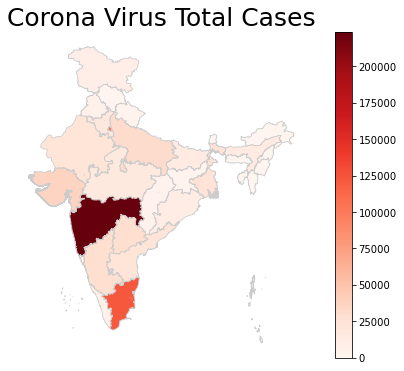

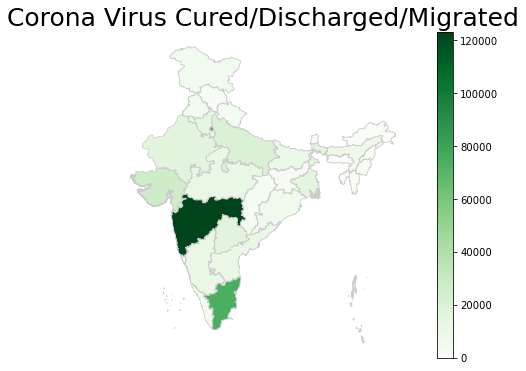

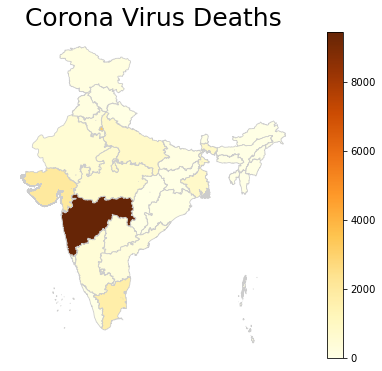

In [7]:
#plotting choropleth
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Corona Virus Total Cases', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='TOTAL CONFIRMED CASES', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)

fig1, ax1 = plt.subplots(1, figsize=(10, 6))
ax1.axis('off')
ax1.set_title('Corona Virus Cured/Discharged/Migrated', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='CURED/DISCHARGED/MIGRATED', cmap='Greens',linewidth=0.8, ax=ax1, edgecolor='0.8',legend=True)

fig2, ax2 = plt.subplots(1, figsize=(10, 6))
ax2.axis('off')
ax2.set_title('Corona Virus Deaths', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='DEATHS', cmap='YlOrBr',linewidth=0.8, ax=ax2, edgecolor='0.8',legend=True)

In [8]:
#summay of data
print('TOTAL CONFIRMED CASES: ',merged['TOTAL CONFIRMED CASES'].sum(),'\nCURED/DISCHARGED/MIGRATED: ',merged['CURED/DISCHARGED/MIGRATED'].sum(),'\nDEATHS: ',merged['DEATHS'].sum())

TOTAL CONFIRMED CASES:  761870.0 
CURED/DISCHARGED/MIGRATED:  475542.0 
DEATHS:  21128.0


In [9]:
merged.reset_index(inplace=True)

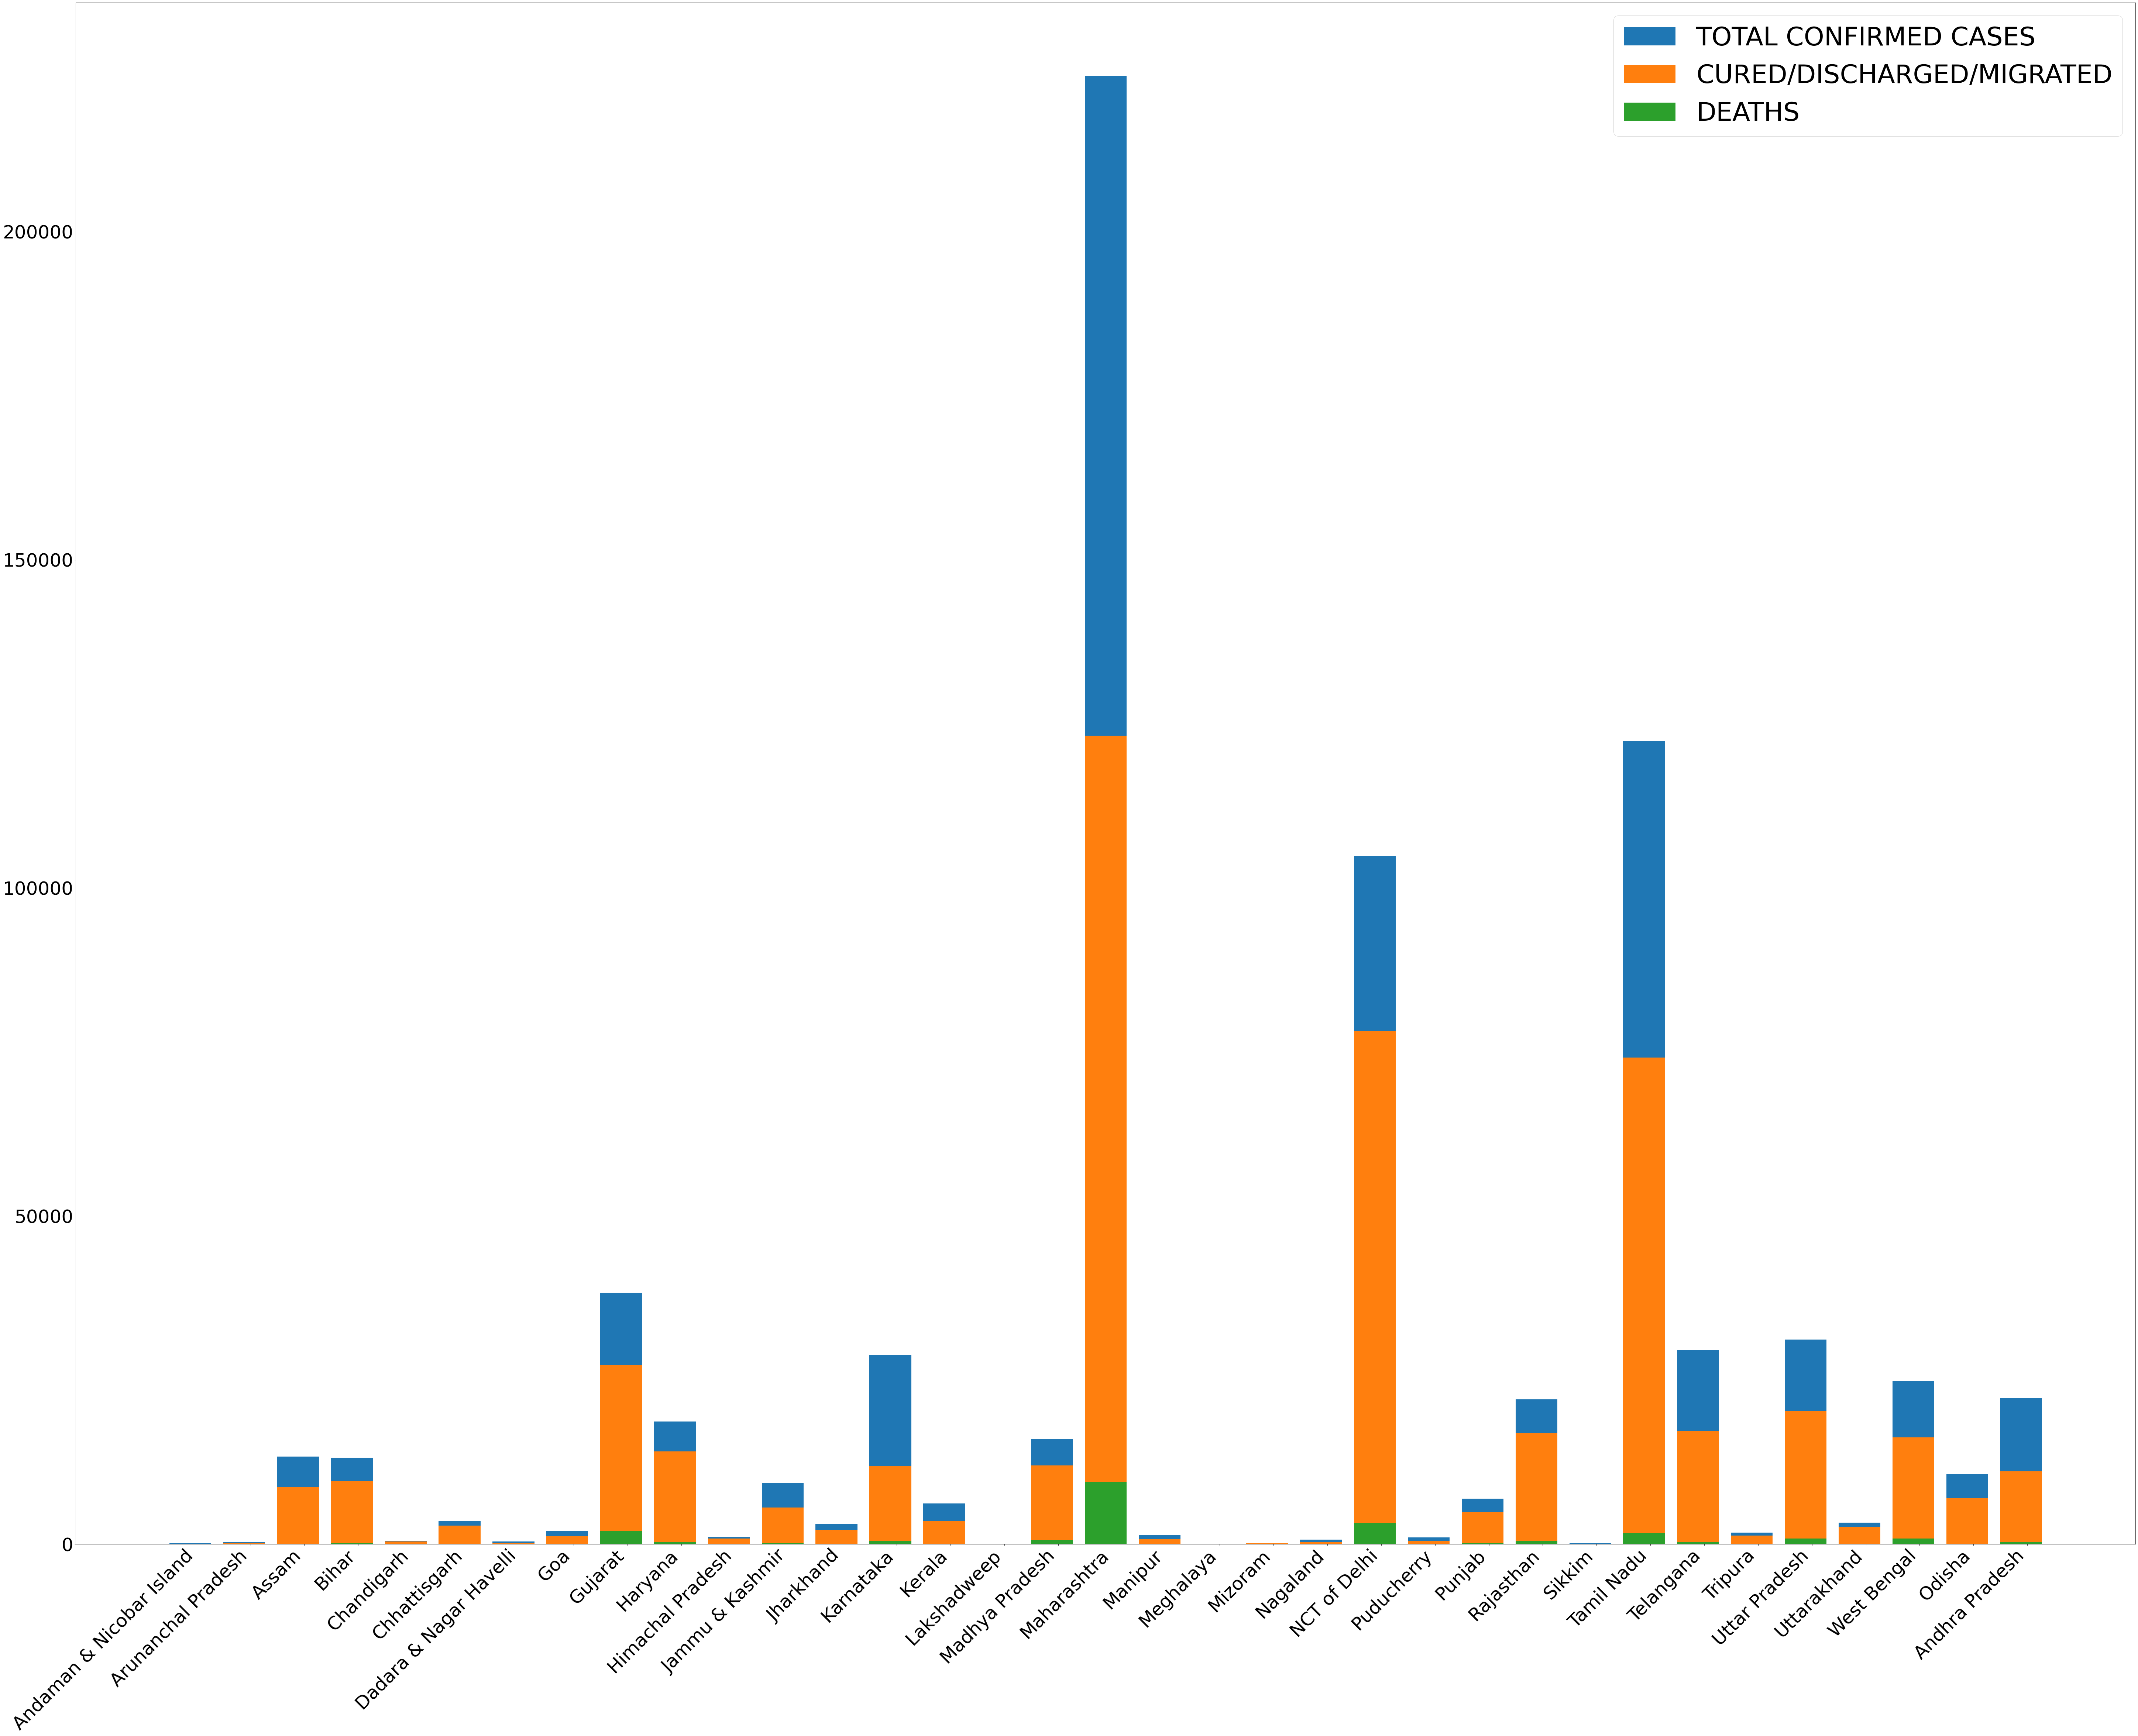

In [33]:
import numpy as np
x_range=np.linspace(0,len(merged['index']),len(merged['index']))
for y_data in ['TOTAL CONFIRMED CASES','CURED/DISCHARGED/MIGRATED','DEATHS']:
    plt.figure(1,figsize=(100,100))
    h = plt.bar(x_range,merged[y_data],label=y_data)
    plt.subplots_adjust(bottom=0.3)
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
    plt.xticks(xticks_pos, merged['index'],  ha='right', rotation=45)
    plt.rc('font', size=60)       
    plt.rc('axes', titlesize=70)  
    plt.rc('axes', labelsize=60)    
    plt.rc('xtick', labelsize=60)    
    plt.rc('ytick', labelsize=60)   
    plt.rc('legend', fontsize=70)   
    plt.legend()
plt.show()

In [34]:
f = plt.figure(figsize=(100,300))

ax1 = f.add_subplot(311)
plt.subplots_adjust(bottom=0.3)
h = ax1.bar(x_range,merged['TOTAL CONFIRMED CASES'],label='TOTAL CONFIRMED CASES')
ax1.set_ylabel('TOTAL CONFIRMED CASES')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, merged['index'],  ha='right', rotation=45)

ax2 = f.add_subplot(312)
plt.subplots_adjust(bottom=0.3)
h = ax2.bar(x_range,merged['CURED/DISCHARGED/MIGRATED'],label='Cured/discharged/migrated')
ax2.set_ylabel('CURED/DISCHARGED/MIGRATED')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, merged['index'],  ha='right', rotation=45)

ax3 = f.add_subplot(313)
plt.subplots_adjust(bottom=0.3)
h = ax3.bar(x_range,merged['DEATHS'],label='DEATHS')
ax3.set_ylabel('DEATHS')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos, merged['index'],  ha='right', rotation=45)

f.tight_layout()
plt.show()